## __Importing Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


## __Reading the Data__

In [2]:
# Read the CSV file and view few samples
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Check number of rows and columns
bike.shape

(730, 16)

In [4]:
# Summary of all the numeric values
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Check Datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the variables above

# __Visualise the data__

## __Visualising Numeric Variables__

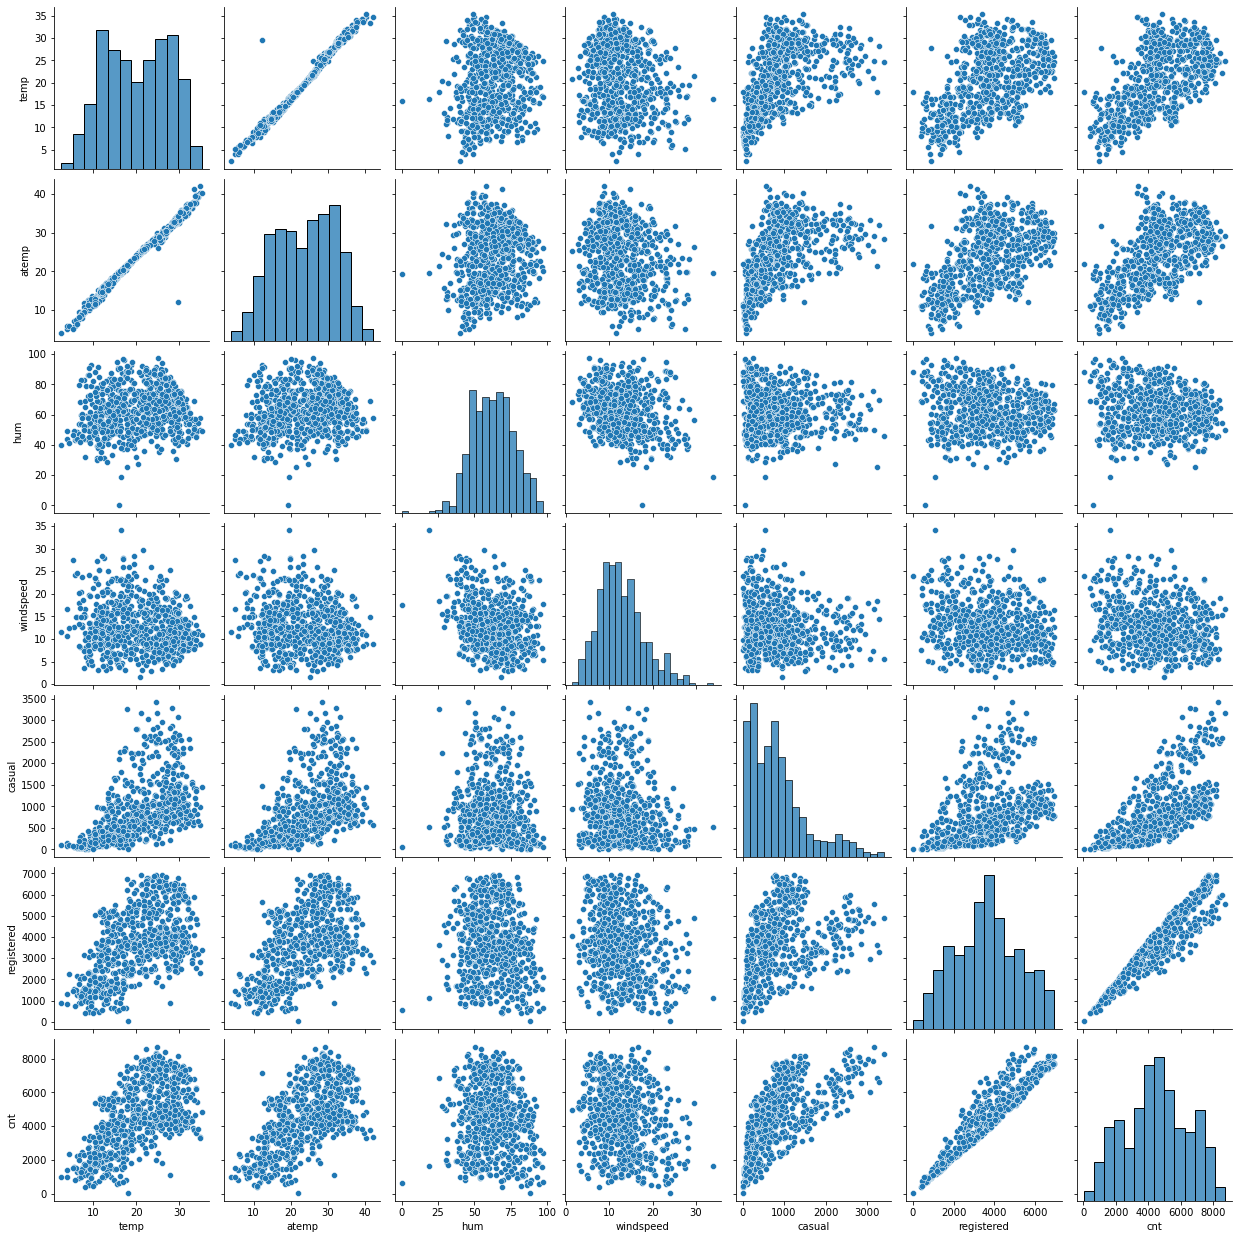

In [7]:
num_var=['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot(bike[num_var])
plt.show()

### `Insights`
- Temp and atemp show linear relationship with cnt
- Registered and casual is not considered since cnt is sum of registered and casual

## __Visualising Categorical Variables__

In [8]:
cat_var = ['season','weekday','yr','mnth','holiday','workingday','weathersit']

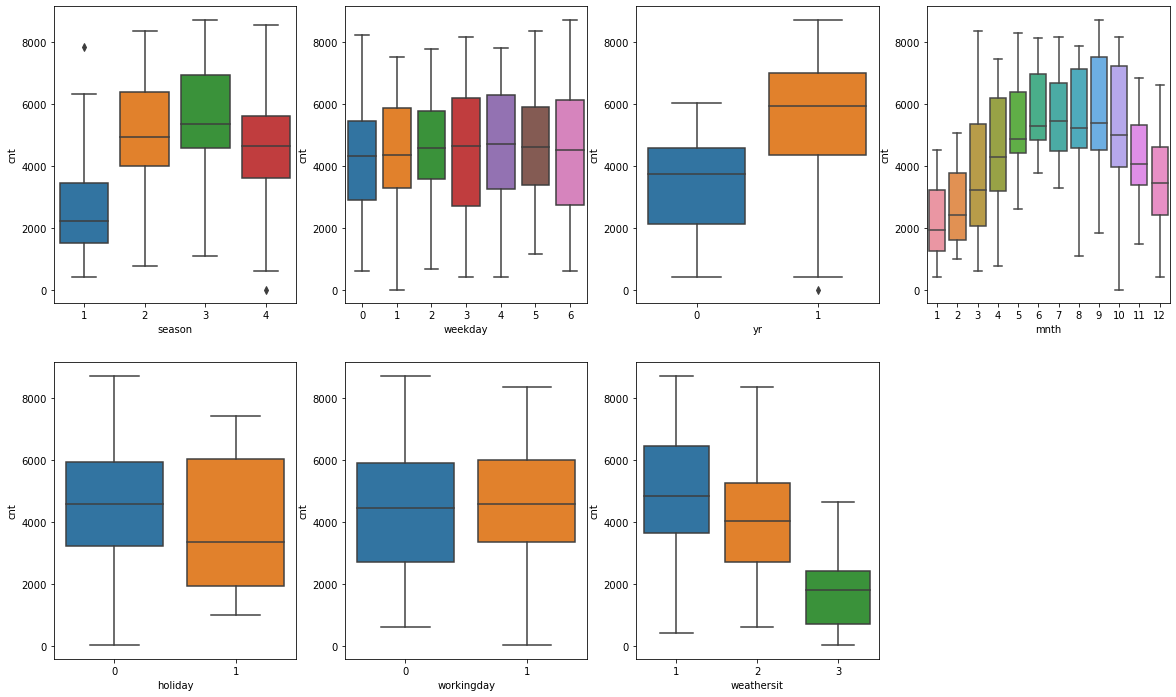

In [9]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = cat_var[0], y = 'cnt', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = cat_var[1], y = 'cnt', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = cat_var[2], y = 'cnt', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = cat_var[3], y = 'cnt', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = cat_var[4], y = 'cnt', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = cat_var[5], y = 'cnt', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = cat_var[6], y = 'cnt', data = bike)

plt.show()

### `Insights`
- Demand for bikes are less in spring as compare to other seasons
- In year 2019 the demand has increased compare to 2018
- From the month of april to october the demand is high and from november it gradually decreases
- Weekday and working day show no significance in bike rentals.
- Bike rentals are high when the weather is clear/partial cloudy

## __Univariate Analysis__

#### 1. Weathersit

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

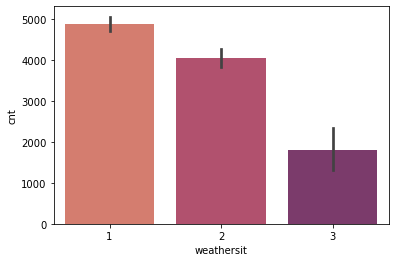

In [10]:
sns.barplot('weathersit','cnt',data=bike, palette = "flare")
plt.show()
           

### `Insights`
__Bike Rentals are more in partly cloudy weather__

#### 2. Season

- 1:spring
- 2:summer
- 3:fall
- 4:winter

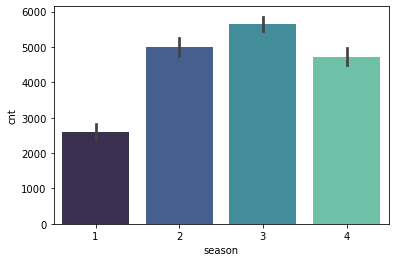

In [11]:
sns.barplot('season','cnt',data=bike,palette="mako")
plt.show()


### `Insights`
__Bike Rentals are more during the Fall season and then in summer__

### 3. Year


- 0: 2018
- 1: 2019

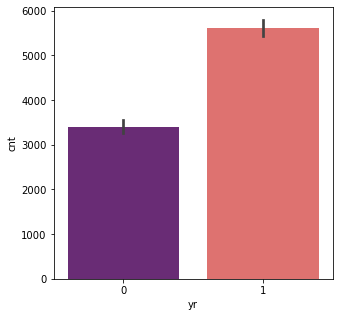

In [12]:
plt.figure(figsize=(5, 5))
sns.barplot('yr','cnt',data=bike, palette ="magma")

plt.show()

### `Insights`
__Bike rentals are more in the year 2019 compared to 2018 Bike Rentals are more in partly cloudy weather__

### 4: Month

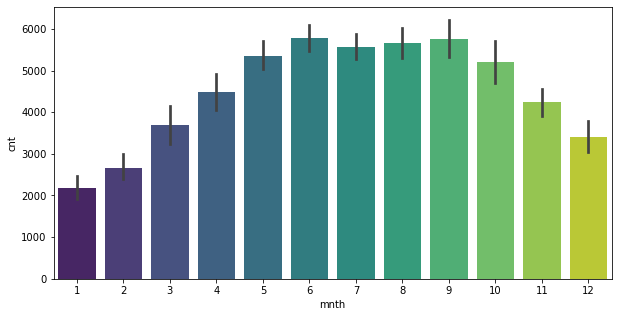

In [13]:
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',data=bike,palette="viridis")
plt.show()

### `Insights`
__From the month of april to sept the demand is high and from november it gradually decreases__

### 5: Temperature

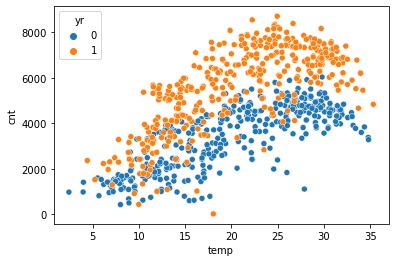

In [14]:
sns.scatterplot(x='temp',y='cnt' ,data=bike,hue="yr")
plt.show()

 ### `Insights`
__Bike Rentals are observed at higher temperatures and in 2019__

### 6: Humidity

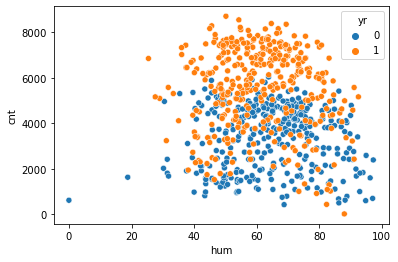

In [15]:
sns.scatterplot(x='hum', y='cnt',data=bike,hue="yr")
plt.show()

### `Insights`
__Bike Rentals are observed at higher humidity levels and in 2019__

## __Data Preparation__

### __Variables like weathersit, season, month, weekday need to be converted into binary__

In [16]:
# converting ordinal variables to catrgorical variables
bike['season'] = bike['season'].astype(str)
bike['weathersit'] = bike['weathersit'].astype(str)
bike['mnth'] = bike['mnth'].astype(str)
bike['weekday'] = bike['weekday'].astype(str)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [17]:
# Creating dummy variables for season, weathersit, month, weekday

seasons=pd.get_dummies(bike.season,drop_first=True)
weathersit=pd.get_dummies(bike.weathersit,drop_first=True)
months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)


In [18]:
seasons.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [19]:
seasons.rename(columns = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}, inplace = True)
seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [20]:
weathersit.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [21]:
weathersit.rename(columns = {'1':'Clear', '2':'Mist + Cloudy', '3':'Light Snow', '4':'Heavy Rain'}, inplace = True)
weathersit.head()

,Mist + Cloudy,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [22]:
months.head()

,10,11,12,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [23]:
months.rename(columns = {'1':'Jan','2':'Feb', '3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}, inplace = True)
months.head()

,Oct,Nov,Dec,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [24]:
weekdays.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [25]:
weekdays.rename(columns = {'1':'Mon','2':'Tue','3':'Wed','4':'Thu','5':'Fri','6':'Sat'},inplace=True)
weekdays.head()

,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [26]:
# Add the variable results to the original bikes dataframe

bike = pd.concat([bike,seasons,months,weathersit,weekdays], axis = 1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Drop season,mnth,weathersit,weekday as we have created the dummies for it

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()



,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#Number of rows and columns
bike.shape

(730, 34)

In [29]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   dteday         730 non-null    object 
 2   yr             730 non-null    int64  
 3   holiday        730 non-null    int64  
 4   workingday     730 non-null    int64  
 5   temp           730 non-null    float64
 6   atemp          730 non-null    float64
 7   hum            730 non-null    float64
 8   windspeed      730 non-null    float64
 9   casual         730 non-null    int64  
 10  registered     730 non-null    int64  
 11  cnt            730 non-null    int64  
 12  summer         730 non-null    uint8  
 13  fall           730 non-null    uint8  
 14  winter         730 non-null    uint8  
 15  Oct            730 non-null    uint8  
 16  Nov            730 non-null    uint8  
 17  Dec            730 non-null    uint8  
 18  Feb       

In [30]:
# drop unwanted variables

bike.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)

In [31]:
bike.shape

(730, 29)

## __Splitting the Data into Training and Testing Sets__

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


## __Rescaling the Features using MinMaxScaler__

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.096078,0.080392,0.343137,0.029412,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.294988,0.272166,0.475223,0.169124,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


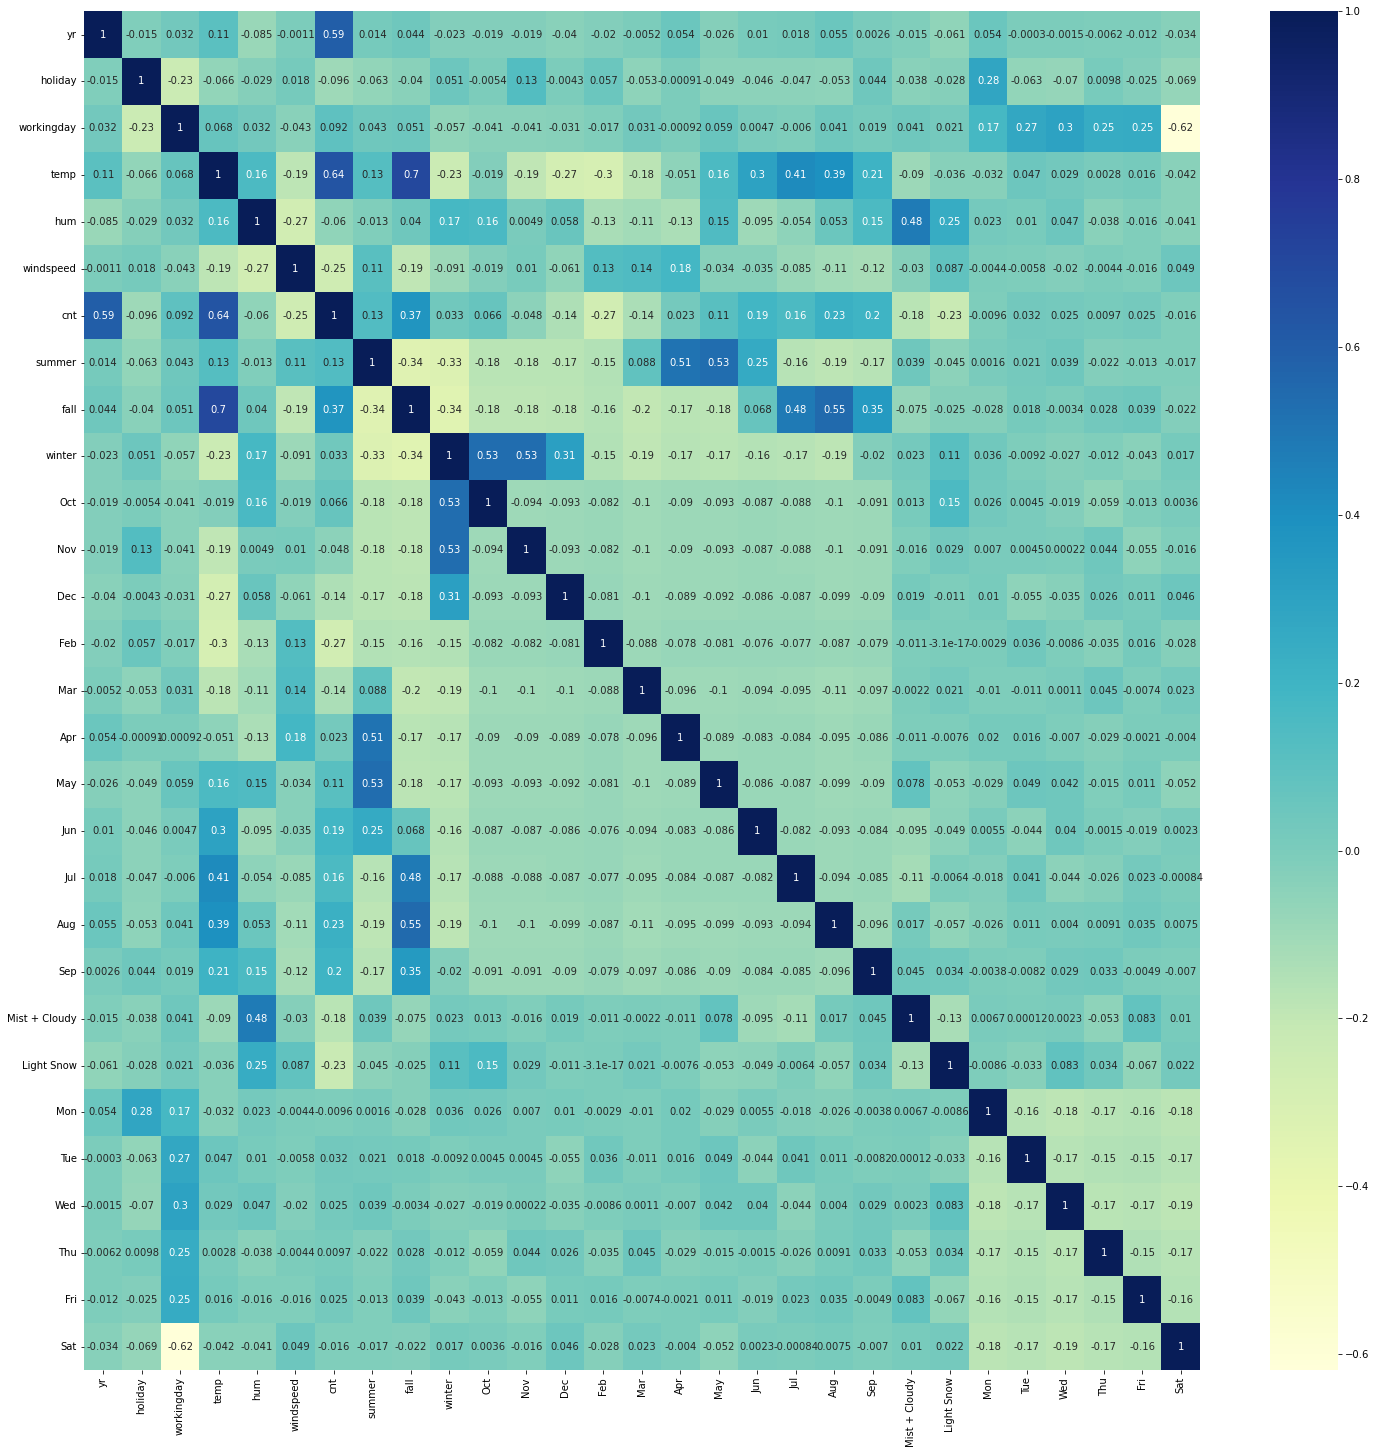

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### `Insights`
- __We can see yr, temp and fall being highly correlated with cnt__

## __Dividing into X and Y sets for the model building__

In [38]:
#Divide the data into X and y
y_train = df_train.pop('cnt')
X_train = df_train

## __Building a linear model__

In [39]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model -1
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
lr.params

const            0.176002
yr               0.232116
holiday         -0.042974
workingday       0.043951
temp             0.450562
hum             -0.151340
windspeed       -0.186453
summer           0.086884
fall             0.048159
winter           0.154006
Oct              0.070310
Nov              0.020925
Dec              0.017191
Feb              0.030495
Mar              0.063822
Apr              0.062777
May              0.086717
Jun              0.059804
Jul              0.022427
Aug              0.077181
Sep              0.143836
Mist + Cloudy   -0.061066
Light Snow      -0.257443
Mon             -0.009827
Tue             -0.007810
Wed              0.005692
Thu              0.001843
Fri              0.011080
Sat              0.054536
dtype: float64

In [41]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.74e-182
Time:                        18:39:26   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1760      0.030      5.798

### VIF

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,Fri,inf
24,Wed,inf
22,Mon,inf
25,Thu,inf
1,holiday,inf
23,Tue,inf
2,workingday,inf
3,temp,47.06
4,hum,20.65
7,fall,15.40


__Following the below priority for droping the variables__
- __High p-value, High VIF__
- __High p-value, low VIF__
- __Low p-value, high VIF__


__Thursday has the highest p-value, followed by atemp, hence we drop Thu__

In [43]:
X_train.drop(['Thu'],inplace=True,axis=1)

In [44]:
# Build a second fitted model 2
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.74e-182
Time:                        18:39:27   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1760      0.030      5.798

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,47.06
4,hum,20.65
7,fall,15.40
8,winter,10.93
18,Aug,10.91
17,Jul,9.60
2,workingday,9.30
6,summer,8.88
19,Sep,7.33
16,Jun,7.31


__Wednesday has the highest p-value, followed by atemp, hence we drop Wed__

In [47]:
X_train.drop(['Wed'],axis=1,inplace=True)

In [48]:
# Rebuilding the model- Model 3

X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.61e-183
Time:                        18:39:27   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1758      0.030      5.799

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,47.06
4,hum,20.64
7,fall,15.38
8,winter,10.93
18,Aug,10.91
17,Jul,9.59
6,summer,8.87
19,Sep,7.33
16,Jun,7.31
15,May,7.14


In [50]:
X_train.drop(['Jul'],axis=1,inplace=True)

In [51]:
# Rebuilding the model- Model 4

X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          9.17e-184
Time:                        18:39:27   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1767      0.030      5.845

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,30.31
4,hum,20.32
7,fall,9.89
8,winter,9.87
6,summer,7.60
2,workingday,6.51
10,Nov,4.47
5,windspeed,4.46
9,Oct,4.39
15,May,3.90


In [53]:
X_train.drop(['Nov'],axis=1,inplace=True)

In [54]:
# Rebuilding the model- Model 5

X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          9.19e-185
Time:                        18:39:27   Log-Likelihood:                 527.68
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1780      0.030      5.918

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.82
4,hum,19.64
7,fall,9.78
6,summer,7.59
2,workingday,6.48
5,windspeed,4.32
8,winter,4.03
14,May,3.87
13,Apr,3.43
15,Jun,2.51


In [56]:
X_train.drop(['Dec'],axis=1,inplace=True)

In [57]:
# Rebuilding the model- Model 6

X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.38e-186
Time:                        18:39:28   Log-Likelihood:                 527.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1785      0.030      5.964

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.56
4,hum,18.63
7,fall,9.77
6,summer,7.59
2,workingday,6.47
5,windspeed,4.32
13,May,3.85
8,winter,3.85
12,Apr,3.42
14,Jun,2.51


In [59]:
X_train.drop(['Fri'],axis=1,inplace=True)

In [60]:
# Rebuilding the model- Model 7

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.44e-187
Time:                        18:39:28   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1789      0.030      5.982

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.56
4,hum,18.61
7,fall,9.77
6,summer,7.59
2,workingday,5.71
5,windspeed,4.32
13,May,3.85
8,winter,3.85
12,Apr,3.42
14,Jun,2.50


In [62]:
X_train.drop(['Tue'],axis=1,inplace=True)

In [63]:
# Rebuilding the model- Model 8

X_train_lm = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.36e-187
Time:                        18:39:28   Log-Likelihood:                 526.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1805      0.030      6.042

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.55
4,hum,18.61
7,fall,9.77
6,summer,7.59
2,workingday,5.35
5,windspeed,4.32
8,winter,3.85
13,May,3.85
12,Apr,3.42
14,Jun,2.50


In [65]:
X_train.drop(['Mon'],axis=1,inplace=True)

In [66]:
# Rebuilding the model- Model 9

X_train_lm = sm.add_constant(X_train)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.04e-188
Time:                        18:39:29   Log-Likelihood:                 526.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1816      0.030      6.078

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.44
4,hum,18.58
7,fall,9.76
6,summer,7.58
2,workingday,5.12
5,windspeed,4.32
8,winter,3.85
13,May,3.85
12,Apr,3.42
14,Jun,2.50


In [68]:
X_train.drop(['Feb'],axis=1,inplace=True)

In [69]:
# Rebuilding the model- Model 10

X_train_lm = sm.add_constant(X_train)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.75e-189
Time:                        18:39:29   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1908      0.029      6.576

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.24
4,hum,17.98
7,fall,9.03
6,summer,7.45
2,workingday,5.09
5,windspeed,4.13
12,May,3.75
11,Apr,3.34
8,winter,3.24
13,Jun,2.45


In [71]:
X_train.drop(['temp'],axis=1,inplace=True)

In [72]:
# Rebuilding the model- Model 11

X_train_lm = sm.add_constant(X_train)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.15e-160
Time:                        18:39:29   Log-Likelihood:                 453.04
No. Observations:                 510   AIC:                            -868.1
Df Residuals:                     491   BIC:                            -787.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2488      0.033      7.545

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.85
5,summer,6.89
2,workingday,5.06
4,windspeed,4.05
6,fall,3.83
11,May,3.47
10,Apr,3.31
7,winter,2.92
12,Jun,2.13
0,yr,2.00


In [74]:
X_train.drop(['hum'],axis=1,inplace=True)

In [75]:
# Rebuilding the model- Model 12

X_train_lm = sm.add_constant(X_train)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     117.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.64e-161
Time:                        18:39:29   Log-Likelihood:                 452.33
No. Observations:                 510   AIC:                            -868.7
Df Residuals:                     492   BIC:                            -792.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2172      0.019     11.491

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,summer,6.76
2,workingday,4.04
3,windspeed,3.66
10,May,3.40
5,fall,3.34
9,Apr,3.31
6,winter,2.39
11,Jun,2.12
12,Aug,2.00
0,yr,1.96


In [77]:
X_train.drop(['holiday'],axis=1,inplace=True)

In [78]:
# Rebuilding the model- Model 13

X_train_lm = sm.add_constant(X_train)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.14e-161
Time:                        18:39:29   Log-Likelihood:                 451.46
No. Observations:                 510   AIC:                            -868.9
Df Residuals:                     493   BIC:                            -796.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2105      0.018     11.572

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,summer,6.76
1,workingday,3.81
2,windspeed,3.50
9,May,3.40
4,fall,3.33
8,Apr,3.31
5,winter,2.35
10,Jun,2.12
11,Aug,2.00
0,yr,1.95


In [80]:
X_train.drop(['summer'],axis=1,inplace=True)

In [81]:
# Rebuilding the model- Model 14

X_train_lm = sm.add_constant(X_train)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

print(lr_14.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.95e-153
Time:                        18:39:30   Log-Likelihood:                 428.76
No. Observations:                 510   AIC:                            -825.5
Df Residuals:                     494   BIC:                            -757.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2241      0.019     11.872

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.79
2,windspeed,3.50
3,fall,3.04
4,winter,2.33
0,yr,1.95
10,Aug,1.94
14,Sat,1.64
5,Oct,1.57
12,Mist + Cloudy,1.55
11,Sep,1.53


- __Here the R square and R square adjusted are 78% and 77% respectively__
- __Model is significant__
- __All variables p-value are lower, i.e. all variables are significant__
- __All VIFs are less than 5, hence multicollinearity does not exists__

## __Residual Analysis of the train data__

In [83]:
y_train_cnt = lr_14.predict(X_train_lm)

Text(0.5, 0, 'Errors')

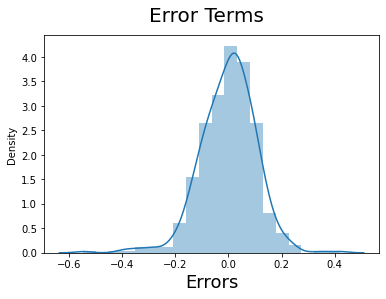

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## __Checking heteroscedasticicty of residuals__

Text(0, 0.5, 'Residuals')

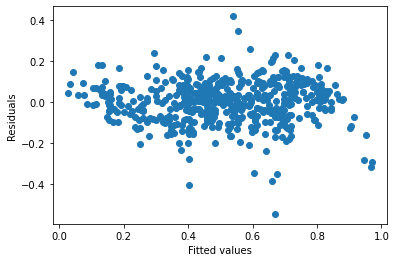

In [85]:
plt.scatter(y_train_cnt, (y_train-y_train_cnt))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

__The plot shows the residulas are randomly disributed, hence no heteroscedasticy in the model__

## __Making Predictions Using the Final Model__

In [86]:
## Applying the scaling on the test set

num_vars = ['temp','hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [87]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.264840,0.246575,0.232877,...,0.059361,0.086758,0.319635,0.027397,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.442259,0.432005,0.423633,...,0.236840,0.282125,0.467403,0.163612,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## __Dividing into X_test and y_test__

In [88]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'fall', 'winter', 'Oct',
       'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep', 'Mist + Cloudy', 'Light Snow',
       'Sat'],
      dtype='object')

In [89]:
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Oct,...,Aug,Sep,Mist + Cloudy,Light Snow,Mon,Tue,Wed,Thu,Fri,Sat
184,0,1,0,0.837241,0.534223,0.149393,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.470417,0.231142,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.236659,0.449707,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
X_test=X_test[[ 'yr', 'workingday', 'windspeed', 'fall', 'winter', 'Oct','Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep', 'Mist + Cloudy', 'Light Snow', 'Sat']]

In [92]:
# Adding constant variable to test dataframe
X_test_m14 = sm.add_constant(X_test)

In [93]:
# Making predictions using the 14th model

y_pred_m14 = lr_14.predict(X_test_m14)

## __Model Evaluation__

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_true = y_test, y_pred = y_pred_m14)

0.7504752100113752

Text(0, 0.5, 'Actuals')

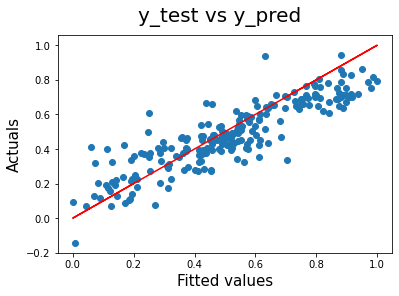

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.plot(y_test,y_test,color="red")
plt.scatter(y_test, y_pred_m14)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading     
plt.xlabel("Fitted values",fontsize = 15)
plt.ylabel("Actuals",fontsize = 15)


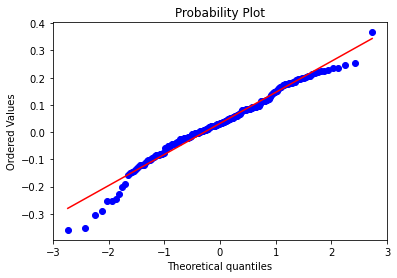

In [97]:
import scipy.stats as stats
stats.probplot(y_test-y_pred_m14, plot=plt)
plt.show()

## __Evaluation__

### __R2 on test dataset__

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m14)

0.7504752100113752

### __R2 on train dataset__

In [99]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_cnt)

0.7835510446175072

In [100]:
lr_12.params

const            0.217170
yr               0.247441
holiday         -0.039865
workingday       0.047322
windspeed       -0.162980
summer           0.160759
fall             0.264773
winter           0.208165
Oct              0.100590
Mar              0.085167
Apr              0.073087
May              0.155007
Jun              0.140300
Aug              0.074576
Sep              0.124878
Mist + Cloudy   -0.093037
Light Snow      -0.309924
Sat              0.056922
dtype: float64

### __We can see that the equation of our best fitted line is:__

$ cnt = 0.217170 + 0.247441*yr + workingday*0.047322 + windspeed*(-0.162980) + Oct*0.100590 + Mar*0.085167 + Apr*0.073087 + May*0.155007 + Jun*0.140300 + Aug*0.074576 + Sep*0.124878 + Mist*(-0.093037) + Light_snow*(-0.309924) + Sat*0.056922 $
